<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Lendo-os-Dados" data-toc-modified-id="Lendo-os-Dados-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Lendo os Dados</a></span></li><li><span><a href="#Centroide-Mais-Próximo" data-toc-modified-id="Centroide-Mais-Próximo-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Centroide Mais Próximo</a></span></li><li><span><a href="#Oficial" data-toc-modified-id="Oficial-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Oficial</a></span></li><li><span><a href="#Imagem" data-toc-modified-id="Imagem-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Imagem</a></span></li><li><span><a href="#Comprimindo-Imagem" data-toc-modified-id="Comprimindo-Imagem-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Comprimindo Imagem</a></span></li><li><span><a href="#Pipeline-Completo-Compressão-de-Imagens" data-toc-modified-id="Pipeline-Completo-Compressão-de-Imagens-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Pipeline Completo Compressão de Imagens</a></span><ul class="toc-item"><li><span><a href="#Centroides-Próximos" data-toc-modified-id="Centroides-Próximos-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Centroides Próximos</a></span></li><li><span><a href="#Movendo-Centroides" data-toc-modified-id="Movendo-Centroides-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Movendo Centroides</a></span></li><li><span><a href="#Inicializando-Centroides" data-toc-modified-id="Inicializando-Centroides-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Inicializando Centroides</a></span></li><li><span><a href="#Rodando-K-Means" data-toc-modified-id="Rodando-K-Means-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Rodando K-Means</a></span></li><li><span><a href="#Programa-Principal" data-toc-modified-id="Programa-Principal-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Programa Principal</a></span></li></ul></li></ul></div>

Este notebook tem por objetivo armazenar o progresso obtido através da realização do exercício 7 do curso de Introdução a Machine Learning - Coursera. Entre os temas abordados, encontra-se o desenvolvimento de soluções envolvendo a utilização do modelo de agrupamento ```k-means``` e do algoritimo de redução de dimensionalidade ```pca```.

## Lendo os Dados

In [1]:
# Lendo os dados
load('ex7data1.mat')

In [2]:
# Verificando dimensões
size(X)

ans =

   50    2



In [3]:
# Do que são feitos os dados?
X

X =

   3.3816   3.3891
   4.5279   5.8542
   2.6557   4.4120
   2.7652   3.7154
   2.8466   4.1755
   3.8907   6.4884
   3.4758   3.6328
   5.9113   6.6808
   3.9289   5.0984
   4.5618   5.6233
   4.5741   5.3977
   4.3717   5.4612
   4.1917   4.9547
   5.2441   4.6615
   2.8358   3.7680
   5.6353   6.3121
   4.6863   5.6652
   2.8505   4.6265
   5.1102   7.3632
   5.1826   4.6465
   5.7073   6.6810
   3.5797   4.8028
   5.6394   6.1204
   4.2635   4.6894
   2.5365   3.8845
   3.2238   4.9426
   4.9295   5.9550
   5.7930   5.1084
   2.8168   4.8190
   3.8888   5.1004
   3.3432   5.8930
   5.8797   5.5214
   3.1039   3.8571
   5.3315   4.6807
   3.3754   4.5654
   4.7767   6.2544
   2.6757   3.7310
   5.5003   5.6795
   1.7971   3.2475
   4.3225   5.1111
   4.4210   6.0256
   3.1793   4.4369
   3.0335   3.9788
   4.6093   5.8798
   2.9638   3.3002
   3.9718   5.4077
   1.1802   2.8787
   1.9190   5.0711
   3.9552   4.5053
   5.1180   6.0851



In [4]:
# Inicializando centroides
initial_centroids = [3 3; 6 2; 8 5]

initial_centroids =

   3   3
   6   2
   8   5



In [5]:
# Na teoria, podemos definir
c1 = initial_centroids(1, :)
c2 = initial_centroids(2, :)
c3 = initial_centroids(3, :)

c1 =

   3   3

c2 =

   6   2

c3 =

   8   5



## Centroide Mais Próximo

In [6]:
% Testando com um exemplo
X(1, :)
initial_centroids

ans =

   3.3816   3.3891

initial_centroids =

   3   3
   6   2
   8   5



In [7]:
# Testando distâncias
X(1, :) - initial_centroids(1, :)
X(1, :) - initial_centroids(2, :)
X(1, :) - initial_centroids(3, :)

ans =

   0.38156   0.38911

ans =

  -2.6184   1.3891

ans =

  -4.6184  -1.6109



In [8]:
# É possível vetorizar essa operação
distances = X(1, :) - initial_centroids

distances =

   0.38156   0.38911
  -2.61844   1.38911
  -4.61844  -1.61089



In [9]:
# Buscando valor mínimo
distancia_quadrada = (X(1,:) - initial_centroids).^2

distancia_quadrada =

    0.14559    0.15141
    6.85621    1.92963
   21.32996    2.59496



In [10]:
# Distância mínima quadrada
min_sqrt_dist = min((X(1,:) - initial_centroids).^2)

min_sqrt_dist =

   0.14559   0.15141



In [11]:
find(distancia_quadrada == min_sqrt_dist)

ans =

   1
   4



In [12]:
# Testando com outro exemplo
X(10, :)
initial_centroids

ans =

   4.5618   5.6233

initial_centroids =

   3   3
   6   2
   8   5



In [13]:
# Buscando mínimo
dist_quad = (X(10, :) - initial_centroids).^2
min_sqrt = min(dist_quad)

dist_quad =

    2.43933    6.88170
    2.06832   13.12830
   11.82098    0.38850

min_sqrt =

   2.06832   0.38850



Com este exemplo, foi possível perceber que aplicar a função ```min()``` não é o modo mais adequado de se retornar a menor distância, visto que foi retornado valores de dois centroides diferentes.

Até o momento, o progresso atual refere-se a obtenção da matriz de distâncias quadráticas entre os dados ```X``` e os centroides ```C```

In [14]:
% Retornando novamente as distâncias
sample = X(1, :);
dist = (sample - initial_centroids).^2

dist =

    0.14559    0.15141
    6.85621    1.92963
   21.32996    2.59496



Eureca! Acredito que seja necessário o cálculo da norma das distâncias quadráticas!

In [15]:
% Testando
distancia = [];
for i=1:3
    distancia = [distancia; sqrt(sum(dist(i, :)))];
endfor
distancia
min(distancia)
find(min(distancia) == distancia)

distancia =

   0.54498
   2.96409
   4.89131

ans =  0.54498
ans =  1


In [16]:
% Aplicando pipeline completo a outro exemplo
sample = X(10, :)
initial_centroids

sample =

   4.5618   5.6233

initial_centroids =

   3   3
   6   2
   8   5



Provavelmente o centroide mais próximo será o 2 ou o 3. Ótimo para testarmos

In [17]:
# Aplicando cálculos
K = 3;
subtracao = sample - initial_centroids
squared_sub = subtracao .^ 2

distancias = [];
for i=1:K
    distancias = [dis]
endfor

subtracao =

   1.56184   2.62330
  -1.43816   3.62330
  -3.43816   0.62330

squared_sub =

    2.43933    6.88170
    2.06832   13.12830
   11.82098    0.38850

error: 'dis' undefined near line 2 column 19


## Oficial

In [18]:
function idx = findClosestCentroids(X, centroids)
%FINDCLOSESTCENTROIDS computes the centroid memberships for every example
%   idx = FINDCLOSESTCENTROIDS (X, centroids) returns the closest centroids
%   in idx for a dataset X where each row is a single example. idx = m x 1 
%   vector of centroid assignments (i.e. each entry in range [1..K])
%

% Set K
K = size(centroids, 1);

% You need to return the following variables correctly.
idx = zeros(size(X,1), 1);

% ====================== YOUR CODE HERE ======================
% Instructions: Go over every example, find its closest centroid, and store
%               the index inside idx at the appropriate location.
%               Concretely, idx(i) should contain the index of the centroid
%               closest to example i. Hence, it should be a value in the 
%               range 1..K
%
% Note: You can use a for-loop over the examples to compute this.
%

% Aplicando pipeline a todo o dataset
m = size(X, 1);
idx = [];
for i = 1:m
    sample = X(i, :);
    dist = sample - centroids;
    
    magnitude = [];
    for i = 1:size(dist, 1)
        magnitude = [magnitude; sqrt(sum(dist(i, :).^2))];
        %idx(i, :) = find(min(magnitude) == magnitude)
    endfor
    
    idx = [idx; find(min(magnitude) == magnitude)];
endfor

%idx = idx(:);


% =============================================================

end

In [19]:
function centroids = computeCentroids(X, idx, K)
%COMPUTECENTROIDS returns the new centroids by computing the means of the 
%data points assigned to each centroid.
%   centroids = COMPUTECENTROIDS(X, idx, K) returns the new centroids by 
%   computing the means of the data points assigned to each centroid. It is
%   given a dataset X where each row is a single data point, a vector
%   idx of centroid assignments (i.e. each entry in range [1..K]) for each
%   example, and K, the number of centroids. You should return a matrix
%   centroids, where each row of centroids is the mean of the data points
%   assigned to it.
%

% Useful variables
[m n] = size(X);

% You need to return the following variables correctly.
centroids = zeros(K, n);


% ====================== YOUR CODE HERE ======================
% Instructions: Go over every centroid and compute mean of all points that
%               belong to it. Concretely, the row vector centroids(i, :)
%               should contain the mean of the data points assigned to
%               centroid i.
%
% Note: You can use a for-loop over the centroids to compute this.
%

for i = 1:K
    number = size(find(idx == i), 1);
    centroids(i, :) = sum([idx == i] .* X) / number;
endfor


% =============================================================


end

In [20]:
% Load an example dataset that we will be using
load('ex7data2.mat');

% Select an initial set of centroids
K = 3; % 3 Centroids
initial_centroids = [3 3; 6 2; 8 5];

% Find the closest centroids for the examples using the
% initial_centroids
idx = findClosestCentroids(X, initial_centroids);

fprintf('Closest centroids for the first 3 examples: \n')
fprintf(' %d', idx(1:3));
fprintf('\n(the closest centroids should be 1, 3, 2 respectively)\n');

Closest centroids for the first 3 examples: 
 1 3 2

(the closest centroids should be 1, 3, 2 respectively)
 1 3 2


In [21]:
%% ===================== Part 2: Compute Means =========================
%  After implementing the closest centroids function, you should now
%  complete the computeCentroids function.
%
fprintf('\nComputing centroids means.\n\n');

%  Compute means based on the closest centroids found in the previous part.
centroids = computeCentroids(X, idx, K);

fprintf('Centroids computed after initial finding of closest centroids: \n')
fprintf(' %f %f \n' , centroids');
fprintf('\n(the centroids should be\n');
fprintf('   [ 2.428301 3.157924 ]\n');
fprintf('   [ 5.813503 2.633656 ]\n');
fprintf('   [ 7.119387 3.616684 ]\n\n');


Computing centroids means.

Centroids computed after initial finding of closest centroids: 
 2.428301 3.157924 
 5.813503 2.633656 
 7.119387 3.616684 

(the centroids should be
   [ 2.428301 3.157924 ]
   [ 5.813503 2.633656 ]
   [ 7.119387 3.616684 ]



In [22]:
idx

idx =

   1
   3
   2
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   2
   1
   1
   1
   1
   2
   1
   1
   1
   2
   1
   1
   1
   1
   1
   1
   1
   2
   1
   2
   2
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   2
   1
   2
   1
   1
   1
   1
   2
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   2
   1
   1
   1
   1
   1
   2
   1
   1
   1
   2
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   2
   1
   1
   1
   1
   1
   1
   1
   1
   2
   1
   

In [23]:
% Encontrando quantidade de dados assimilados ao centroide
for i = 1:K
    qtd = size(find(idx == i), 1);
    fprintf('Exemplos pertencentes ao centroide %d: %d\n', i, qtd)
endfor

Exemplos pertencentes ao centroide 1: 191
Exemplos pertencentes ao centroide 2: 103
Exemplos pertencentes ao centroide 3: 6


In [24]:
% Visão geral sobre os dados X
X(1:10, :)

ans =

   1.8421   4.6076
   5.6586   4.8000
   6.3526   3.2909
   2.9040   4.6122
   3.2320   4.9399
   1.2479   4.9327
   1.9762   4.4349
   2.2345   5.0555
   2.9834   4.8405
   2.9797   4.8067



In [25]:
% Verificando
sum([idx == 1] .* X) / 191

ans =

   2.4283   3.1579



In [26]:
X_teste = [X; zeros(size(X), 1)]

error: vertical dimensions mismatch (300x2 vs 300x1)


In [27]:
X_teste = [X zeros(size(X), 1)](1:5, :)

X_teste =

   1.84208   4.60757   0.00000
   5.65858   4.79996   0.00000
   6.35258   3.29085   0.00000
   2.90402   4.61220   0.00000
   3.23198   4.93989   0.00000



In [28]:
sum(idx == 1) .* X_teste

ans =

    351.83719    880.04618      0.00000
   1080.78938    916.79313      0.00000
   1213.34257    628.55321      0.00000
    554.66716    880.93099      0.00000
    617.30802    943.51976      0.00000



Pq será que com a imagem não deu certo?

In [29]:
%  Load an image of a bird
A = double(imread('bird_small.png'));

% If imread does not work for you, you can try instead
%   load ('bird_small.mat');

A = A / 255; % Divide by 255 so that all values are in the range 0 - 1

% Size of the image
img_size = size(A);

% Reshape the image into an Nx3 matrix where N = number of pixels.
% Each row will contain the Red, Green and Blue pixel values
% This gives us our dataset matrix X that we will use K-Means on.
X = reshape(A, img_size(1) * img_size(2), 3);

% Run your K-Means algorithm on this data
% You should try different values of K and max_iters here
K = 16; 
max_iters = 10;

% When using K-Means, it is important the initialize the centroids
% randomly. 
% You should complete the code in kMeansInitCentroids.m before proceeding
initial_centroids = kMeansInitCentroids(X, K);

% Run K-Means
[centroids, idx] = runkMeans(X, initial_centroids, max_iters);


error: 'kMeansInitCentroids' undefined near line 4 column 21
error: 'runkMeans' undefined near line 2 column 18


In [30]:
function centroids = kMeansInitCentroids(X, K)
%KMEANSINITCENTROIDS This function initializes K centroids that are to be 
%used in K-Means on the dataset X
%   centroids = KMEANSINITCENTROIDS(X, K) returns K initial centroids to be
%   used with the K-Means on the dataset X
%

% You should return this values correctly
centroids = zeros(K, size(X, 2));

% ====================== YOUR CODE HERE ======================
% Instructions: You should set centroids to randomly chosen examples from
%               the dataset X
%

% Randomly reorder the indices of examples
randidx = randperm(size(X, 1));
% Take the first K examples as centroids
centroids = X(randidx(1:K), :);

% =============================================================

end

In [31]:
function [centroids, idx] = runkMeans(X, initial_centroids, ...
                                      max_iters, plot_progress)
%RUNKMEANS runs the K-Means algorithm on data matrix X, where each row of X
%is a single example
%   [centroids, idx] = RUNKMEANS(X, initial_centroids, max_iters, ...
%   plot_progress) runs the K-Means algorithm on data matrix X, where each 
%   row of X is a single example. It uses initial_centroids used as the
%   initial centroids. max_iters specifies the total number of interactions 
%   of K-Means to execute. plot_progress is a true/false flag that 
%   indicates if the function should also plot its progress as the 
%   learning happens. This is set to false by default. runkMeans returns 
%   centroids, a Kxn matrix of the computed centroids and idx, a m x 1 
%   vector of centroid assignments (i.e. each entry in range [1..K])
%

% Set default value for plot progress
if ~exist('plot_progress', 'var') || isempty(plot_progress)
    plot_progress = false;
end

% Plot the data if we are plotting progress
if plot_progress
    figure;
    hold on;
end

% Initialize values
[m n] = size(X);
K = size(initial_centroids, 1);
centroids = initial_centroids;
previous_centroids = centroids;
idx = zeros(m, 1);

% Run K-Means
for i=1:max_iters
    
    % Output progress
    fprintf('K-Means iteration %d/%d...\n', i, max_iters);
    if exist('OCTAVE_VERSION')
        fflush(stdout);
    end
    
    % For each example in X, assign it to the closest centroid
    idx = findClosestCentroids(X, centroids);
    
    % Optionally, plot progress here
    if plot_progress
        plotProgresskMeans(X, centroids, previous_centroids, idx, K, i);
        previous_centroids = centroids;
        fprintf('Press enter to continue.\n');
        pause;
    end
    
    % Given the memberships, compute new centroids
    centroids = computeCentroids(X, idx, K);
end

% Hold off if we are plotting progress
if plot_progress
    hold off;
end

end

In [32]:
%  Load an image of a bird
%A = double(imread('bird_small.png'));

% If imread does not work for you, you can try instead
load ('bird_small.mat');

A = A / 255; % Divide by 255 so that all values are in the range 0 - 1

% Size of the image
img_size = size(A);

% Reshape the image into an Nx3 matrix where N = number of pixels.
% Each row will contain the Red, Green and Blue pixel values
% This gives us our dataset matrix X that we will use K-Means on.
X = reshape(A, img_size(1) * img_size(2), 3);

% Run your K-Means algorithm on this data
% You should try different values of K and max_iters here
K = 16; 
max_iters = 10;

% When using K-Means, it is important the initialize the centroids
% randomly. 
% You should complete the code in kMeansInitCentroids.m before proceeding
initial_centroids = kMeansInitCentroids(X, K);

% Run K-Means
[centroids, idx] = runkMeans(X, initial_centroids, max_iters);


K-Means iteration 1/10...
error: computeCentroids: product: nonconformant arguments (op1 is 16385x1, op2 is 16384x3)
error: called from
    computeCentroids at line 31 column 21
    runkMeans at line 55 column 15


In [33]:
X(1:5, :)

ans =

   0.85882   0.70588   0.40392
   0.90196   0.75686   0.46667
   0.89412   0.74902   0.48235
   0.85490   0.71373   0.47451
   0.82745   0.69020   0.42745



In [34]:
% Verificando variáveis envolvidas
size(A)
size(X)

ans =

   128   128     3

ans =

   16384       3



In [35]:
X(1:5, :)

ans =

   0.85882   0.70588   0.40392
   0.90196   0.75686   0.46667
   0.89412   0.74902   0.48235
   0.85490   0.71373   0.47451
   0.82745   0.69020   0.42745



In [36]:
initial_centroids

initial_centroids =

   0.996078   0.839216   0.792157
   0.317647   0.392157   0.662745
   0.411765   0.368627   0.325490
   0.501961   0.317647   0.141176
   0.898039   0.764706   0.474510
   0.992157   0.972549   0.807843
   0.745098   0.556863   0.501961
   0.803922   0.658824   0.392157
   0.164706   0.176471   0.188235
   0.572549   0.415686   0.262745
   0.831373   0.623529   0.317647
   0.501961   0.376471   0.384314
   0.980392   0.721569   0.486275
   0.137255   0.160784   0.129412
   0.968627   0.925490   0.533333
   0.070588   0.082353   0.062745



In [ ]:
centroids = initial_centroids;
idx = findClosestCentroids(X, centroids);

In [ ]:
% Verificando índices
idx

idx =

    8
    5
    5
    5
    8
    5
    8
    8
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    7
    8
    5
    8
    7
    7
    5
    7
    9
    3
    7
    7
   12
    9
    9
    9
    9
    4
   10
    3
    3
    3
    3
    9
    9
    9
    9
    9
    9
    9
    9
   14
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    7
    7
    8
    5
    5
    5
    7
    3
    9
    7
    7
   

   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   14
   14
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
    5
    5
    8
    8
    8
    8
    8
    8
    8
    8
    8
    5
    5
    5
    8
    8
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    8
    8
    8
   10
    7
    7
    7
    8
    7
    7
    8
    5
    5
    7
    7
    7
    8
    8
    8
    7
    7
    7
    7
    7
    7
    7
    7
    3
    3
    3
    3
    9
   14
    9
    9
    9
   14
    9
    9
    9
    9
    9
    9
   14
   14
   14
   14
   14
   14
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   14
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   14
   14
   14
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   1

    8
    8
    8
    8
    8
    8
    8
    8
   10
   10
   10
   10
   10
    3
   12
    3
    9
    9
    9
    9
    9
   14
    9
    9
   14
   14
   14
   14
   14
   14
   14
   14
   14
   16
   16
   16
   14
   14
   14
   14
   14
   14
   14
   14
   14
   14
   14
   14
    9
    9
    9
   14
   14
   14
   14
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   14
   14
    5
    8
    5
    5
    5
    5
    5
    8
    8
    8
    5
    5
    5
    8
    8
    8
    8
    8
    8
    8
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    5
    8
    8
    8
    8
    5
    5
    5
    8
    8
    8
    8
    8
    8
    8
   11
   10
   10
   10
   10
   10
   10
   12
   12
    3
    9
    9
    9
    9
    9
    9
    9
    9
   14
   14
   14
   14
   14
   14
   14
   14
   14
   16
   16
   16
   16
   14
   1

    8
    7
   10
   10
   10
    7
   12
    3
    3
    3
   12
   12
    7
    7
    2
    2
    2
    2
    2
    2
    1
    1
    6
    7
   12
    4
   11
   11
   10
    7
    7
    1
    1
    6
    6
   15
   13
   13
    8
   11
    7
    7
    1
    6
    6
    6
    1
    1
   13
   13
   13
   13
   13
   11
   11
   11
    8
    6
    1
    1
   13
   11
   11
   11
    5
   15
   15
   15
   15
   15
   15
   15
   15
   15
   15
    6
    6
    6
    6
    6
    6
    6
    6
    6
    6
    6
    6
    6
    6
    6
    6
    6
    6
    6
    6
    6
    6
    6
    6
    6
    6
   15
   15
   15
   15
    8
    3
    3
   10
   10
   10
    3
    3
    9
    9
    9
    9
    9
    9
    9
    9
   14
   14
   14
   14
    8
    8
    8
    8
   10
    7
    7
   12
   12
    3
    9
    3
    3
   12
    7
    7
    7
    7
    2
    2
    2
    2
    2
    1
    6
    1
    7
    3
   10
    8
   11
   10
    7
    7
    1
    1
    6
    1
   15
   13
   11
   1

    6
   15
   15
   15
    6
    6
   15
   15
   15
   15
   15
   15
   15
   15
   15
    5
    5
   11
   11
   10
   10
    3
    4
    4
    4
   12
   12
   12
    3
    3
    3
   12
   12
   12
    3
    3
    3
    3
    9
    8
    8
    8
    8
    7
    7
    7
    7
   12
   12
   12
    7
    1
    1
    6
    1
    2
    2
    2
    2
    2
    2
    1
    1
    7
    7
    7
    7
    7
    6
   15
    5
   11
    8
    5
    6
    6
    6
    6
   13
   13
   11
   11
   11
   11
   10
   10
    7
    6
    6
    1
   13
   13
   11
   11
   11
   11
   11
   11
    8
    1
    1
    1
    1
    1
   15
   13
   11
   11
   11
   11
   11
    5
    5
    5
   15
   15
    6
    6
    6
    6
    6
    6
    6
    6
    6
   15
    6
   15
   15
   15
   15
   15
    6
    6
   15
    6
   15
   15
    6
    6
    1
   15
    5
    5
    8
   11
    7
   10
   12
   10
    4
    4
    9
    9
    9
    9
    9
    9
    9
    9
    9
    9
    9
    9
    9
    9
    

   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   14
   14
   14
   14
   14
    9
    9
    9
    3
   12
    7
    3
    3
    3
    3
    4
    4
    4
    9
    9
    9
    9
    9
    9
    3
   12
    7
    7
    7
    7
    7
    7
    7
    7
    7
    7
    7
    7
   12
   12
   12
   12
   12
   12
    7
    7
    7
    7
    7
    7
    7
    7
    7
    7
    7
    7
    7
    7
    7
    7
   12
   12
   12
   12
    4
    3
    4
    9
    3
    3
    3
    3
    3
    3
    3
   12
    3
   12
   12
    3
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   16
   14
   14
   14
   14
   14
   14
   14
   14
   14
    9
    3
    3
    

In [ ]:
% Até o momento parece estar tudo OK
size(idx)

In [ ]:
size(X)

Parece que aí está o problema! Temos um vetor de índices de tamanho ```16419 x 1``` e um conjunto de dados de tamanho ```16384 x 3```. 

Como é possível que o vetor de índices tenha uma quantidade de linhas maior que o próprio conjunto de dados, uma vez que cada elemento deste vetor indica a qual centroide o dado X_i está relacionado?

In [ ]:
size(idx, 1) - size(X, 1)

In [ ]:
m = size(X, 1)
idx = []
sample = X(1, :)
dist = sample - centroids

In [ ]:
magnitude = [];
magnitude = [magnitude; sqrt(sum(dist(1, :).^2))]
magnitude = [magnitude; sqrt(sum(dist(2, :).^2))]
magnitude = [magnitude; sqrt(sum(dist(3, :).^2))]

In [ ]:
idx = [idx; find(min(magnitude) == magnitude)]

Palpite: o modelo está encontrado dois valores para a magnitude mínima (distância mínima)

In [ ]:
find(min(magnitude) == magnitude)

In [ ]:
% Testando valores iguais
magnitude(1) = magnitude(2)
find(min(magnitude) == magnitude)

In [ ]:
m = size(X, 1);
idx = [];
for i = 1:m
    i
    sample = X(i, :);
    dist = sample - centroids;
    magnitude = [];
    for j = 1:size(dist, 1)
        magnitude = [magnitude; sqrt(sum(dist(j, :).^2))];
        %idx(i, :) = find(min(magnitude) == magnitude)
    endfor
    
    idx = [idx; find(min(magnitude) == magnitude)];
    size(idx, 1)
    
endfor

Mapeando o problema, foi possível perceber que quando i = 1137, ou seja, quanto trata-se do dado X(1137), a matriz ```idx``` aumentou em 2 unidades o seu tamanho, passando de 1136 para 1138, ficando assim desalinhada com o conjunto de dados.

In [ ]:
X(1137, :)

In [ ]:
idx = [];
sample = X(i, :);
dist = sample - centroids

In [ ]:
magnitude = [];
for j = 1:size(dist, 1)
    magnitude = [magnitude; sqrt(sum(dist(j, :).^2))]
    %idx(i, :) = find(min(magnitude) == magnitude)
endfor

In [ ]:
idx = [idx; find(min(magnitude) == magnitude)]

Nada de anormal. O problema pode ter ocorrido então no índice 1136

In [ ]:
sample = X(1136, :)
dist = sample = centroids

In [ ]:
magnitude = [];
for j = 1:size(dist, 1)
    magnitude = [magnitude; sqrt(sum(dist(j, :).^2))]
    %idx(i, :) = find(min(magnitude) == magnitude)
endfor

In [ ]:
find(min(magnitude) == magnitude)

In [ ]:
% Testando novamente
m = size(X, 1);
idx = [];
for i = 1:m
    i
    sample = X(i, :);
    dist = sample - centroids;
    magnitude = [];
    for j = 1:size(dist, 1)
        magnitude = [magnitude; sqrt(sum(dist(j, :).^2))];
        %idx(i, :) = find(min(magnitude) == magnitude)
    endfor
    
    idx = [idx; find(min(magnitude) == magnitude)];
    size(idx, 1)
    
endfor

Mesmo erro. Tentando nova lógica.

In [62]:
m = size(X, 1)
idx = zeros(m, 1);

m =  16384


In [92]:
m = size(X, 1);
idx = zeros(m, 1);
for i = 1:m
    i
    sample = X(i, :);
    dist = sample - centroids;
    magnitude = [];
    for j = 1:size(dist, 1)
        magnitude = [magnitude; sqrt(sum(dist(j, :).^2))];
        %idx(i, :) = find(min(magnitude) == magnitude)
    endfor
    
    idx(i) = find(min(magnitude) == magnitude);
    size(idx, 1)
    
endfor

i =  1
ans =  16384
i =  2
ans =  16384
i =  3
ans =  16384
i =  4
ans =  16384
i =  5
ans =  16384
i =  6
ans =  16384
i =  7
ans =  16384
i =  8
ans =  16384
i =  9
ans =  16384
i =  10
ans =  16384
i =  11
ans =  16384
i =  12
ans =  16384
i =  13
ans =  16384
i =  14
ans =  16384
i =  15
ans =  16384
i =  16
ans =  16384
i =  17
ans =  16384
i =  18
ans =  16384
i =  19
ans =  16384
i =  20
ans =  16384
i =  21
ans =  16384
i =  22
ans =  16384
i =  23
ans =  16384
i =  24
ans =  16384
i =  25
ans =  16384
i =  26
ans =  16384
i =  27
ans =  16384
i =  28
ans =  16384
i =  29
ans =  16384
i =  30
ans =  16384
i =  31
ans =  16384
i =  32
ans =  16384
i =  33
ans =  16384
i =  34
ans =  16384
i =  35
ans =  16384
i =  36
ans =  16384
i =  37
ans =  16384
i =  38
ans =  16384
i =  39
ans =  16384
i =  40
ans =  16384
i =  41
ans =  16384
i =  42
ans =  16384
i =  43
ans =  16384
i =  44
ans =  16384
i =  45
ans =  16384
i =  46
ans =  16384
i =  47
ans =  16384
i =  48
ans =  16384
i

ans =  16384
i =  379
ans =  16384
i =  380
ans =  16384
i =  381
ans =  16384
i =  382
ans =  16384
i =  383
ans =  16384
i =  384
ans =  16384
i =  385
ans =  16384
i =  386
ans =  16384
i =  387
ans =  16384
i =  388
ans =  16384
i =  389
ans =  16384
i =  390
ans =  16384
i =  391
ans =  16384
i =  392
ans =  16384
i =  393
ans =  16384
i =  394
ans =  16384
i =  395
ans =  16384
i =  396
ans =  16384
i =  397
ans =  16384
i =  398
ans =  16384
i =  399
ans =  16384
i =  400
ans =  16384
i =  401
ans =  16384
i =  402
ans =  16384
i =  403
ans =  16384
i =  404
ans =  16384
i =  405
ans =  16384
i =  406
ans =  16384
i =  407
ans =  16384
i =  408
ans =  16384
i =  409
ans =  16384
i =  410
ans =  16384
i =  411
ans =  16384
i =  412
ans =  16384
i =  413
ans =  16384
i =  414
ans =  16384
i =  415
ans =  16384
i =  416
ans =  16384
i =  417
ans =  16384
i =  418
ans =  16384
i =  419
ans =  16384
i =  420
ans =  16384
i =  421
ans =  16384
i =  422
ans =  16384
i =  423
ans =  163

i =  751
ans =  16384
i =  752
ans =  16384
i =  753
ans =  16384
i =  754
ans =  16384
i =  755
ans =  16384
i =  756
ans =  16384
i =  757
ans =  16384
i =  758
ans =  16384
i =  759
ans =  16384
i =  760
ans =  16384
i =  761
ans =  16384
i =  762
ans =  16384
i =  763
ans =  16384
i =  764
ans =  16384
i =  765
ans =  16384
i =  766
ans =  16384
i =  767
ans =  16384
i =  768
ans =  16384
i =  769
ans =  16384
i =  770
ans =  16384
i =  771
ans =  16384
i =  772
ans =  16384
i =  773
ans =  16384
i =  774
ans =  16384
i =  775
ans =  16384
i =  776
ans =  16384
i =  777
ans =  16384
i =  778
ans =  16384
i =  779
ans =  16384
i =  780
ans =  16384
i =  781
ans =  16384
i =  782
ans =  16384
i =  783
ans =  16384
i =  784
ans =  16384
i =  785
ans =  16384
i =  786
ans =  16384
i =  787
ans =  16384
i =  788
ans =  16384
i =  789
ans =  16384
i =  790
ans =  16384
i =  791
ans =  16384
i =  792
ans =  16384
i =  793
ans =  16384
i =  794
ans =  16384
i =  795
ans =  16384
i =  796
a

ans =  16384
i =  1119
ans =  16384
i =  1120
ans =  16384
i =  1121
ans =  16384
i =  1122
ans =  16384
i =  1123
ans =  16384
i =  1124
ans =  16384
i =  1125
ans =  16384
i =  1126
ans =  16384
i =  1127
ans =  16384
i =  1128
ans =  16384
i =  1129
ans =  16384
i =  1130
ans =  16384
i =  1131
ans =  16384
i =  1132
ans =  16384
i =  1133
ans =  16384
i =  1134
ans =  16384
i =  1135
ans =  16384
i =  1136
ans =  16384
i =  1137
ans =  16384
i =  1138
ans =  16384
i =  1139
ans =  16384
i =  1140
ans =  16384
i =  1141
ans =  16384
i =  1142
ans =  16384
i =  1143
ans =  16384
i =  1144
ans =  16384
i =  1145
ans =  16384
i =  1146
ans =  16384
i =  1147
ans =  16384
i =  1148
ans =  16384
i =  1149
ans =  16384
i =  1150
ans =  16384
i =  1151
ans =  16384
i =  1152
ans =  16384
i =  1153
ans =  16384
i =  1154
ans =  16384
i =  1155
ans =  16384
i =  1156
ans =  16384
i =  1157
ans =  16384
i =  1158
ans =  16384
i =  1159
ans =  16384
i =  1160
ans =  16384
i =  1161
ans =  1638

i =  1475
ans =  16384
i =  1476
ans =  16384
i =  1477
ans =  16384
i =  1478
ans =  16384
i =  1479
ans =  16384
i =  1480
ans =  16384
i =  1481
ans =  16384
i =  1482
ans =  16384
i =  1483
ans =  16384
i =  1484
ans =  16384
i =  1485
ans =  16384
i =  1486
ans =  16384
i =  1487
ans =  16384
i =  1488
ans =  16384
i =  1489
ans =  16384
i =  1490
ans =  16384
i =  1491
ans =  16384
i =  1492
ans =  16384
i =  1493
ans =  16384
i =  1494
ans =  16384
i =  1495
ans =  16384
i =  1496
ans =  16384
i =  1497
ans =  16384
i =  1498
ans =  16384
i =  1499
ans =  16384
i =  1500
ans =  16384
i =  1501
ans =  16384
i =  1502
ans =  16384
i =  1503
ans =  16384
i =  1504
ans =  16384
i =  1505
ans =  16384
i =  1506
ans =  16384
i =  1507
ans =  16384
i =  1508
ans =  16384
i =  1509
ans =  16384
i =  1510
ans =  16384
i =  1511
ans =  16384
i =  1512
ans =  16384
i =  1513
ans =  16384
i =  1514
ans =  16384
i =  1515
ans =  16384
i =  1516
ans =  16384
i =  1517
ans =  16384
i =  1518
a

ans =  16384
i =  1832
ans =  16384
i =  1833
ans =  16384
i =  1834
ans =  16384
i =  1835
ans =  16384
i =  1836
ans =  16384
i =  1837
ans =  16384
i =  1838
ans =  16384
i =  1839
ans =  16384
i =  1840
ans =  16384
i =  1841
ans =  16384
i =  1842
ans =  16384
i =  1843
ans =  16384
i =  1844
ans =  16384
i =  1845
ans =  16384
i =  1846
ans =  16384
i =  1847
ans =  16384
i =  1848
ans =  16384
i =  1849
ans =  16384
i =  1850
ans =  16384
i =  1851
ans =  16384
i =  1852
ans =  16384
i =  1853
ans =  16384
i =  1854
ans =  16384
i =  1855
ans =  16384
i =  1856
ans =  16384
i =  1857
ans =  16384
i =  1858
ans =  16384
i =  1859
ans =  16384
i =  1860
ans =  16384
i =  1861
ans =  16384
i =  1862
ans =  16384
i =  1863
ans =  16384
i =  1864
ans =  16384
i =  1865
ans =  16384
i =  1866
ans =  16384
i =  1867
ans =  16384
i =  1868
ans =  16384
i =  1869
ans =  16384
i =  1870
ans =  16384
i =  1871
ans =  16384
i =  1872
ans =  16384
i =  1873
ans =  16384
i =  1874
ans =  1638

i =  2188
ans =  16384
i =  2189
ans =  16384
i =  2190
ans =  16384
i =  2191
ans =  16384
i =  2192
ans =  16384
i =  2193
ans =  16384
i =  2194
ans =  16384
i =  2195
ans =  16384
i =  2196
ans =  16384
i =  2197
ans =  16384
i =  2198
ans =  16384
i =  2199
ans =  16384
i =  2200
ans =  16384
i =  2201
ans =  16384
i =  2202
ans =  16384
i =  2203
ans =  16384
i =  2204
ans =  16384
i =  2205
ans =  16384
i =  2206
ans =  16384
i =  2207
ans =  16384
i =  2208
ans =  16384
i =  2209
ans =  16384
i =  2210
ans =  16384
i =  2211
ans =  16384
i =  2212
ans =  16384
i =  2213
ans =  16384
i =  2214
ans =  16384
i =  2215
ans =  16384
i =  2216
ans =  16384
i =  2217
ans =  16384
i =  2218
ans =  16384
i =  2219
ans =  16384
i =  2220
ans =  16384
i =  2221
ans =  16384
i =  2222
ans =  16384
i =  2223
ans =  16384
i =  2224
ans =  16384
i =  2225
ans =  16384
i =  2226
ans =  16384
i =  2227
ans =  16384
i =  2228
ans =  16384
i =  2229
ans =  16384
i =  2230
ans =  16384
i =  2231
a

In [96]:
X(2343, :)

ans =

   0.81176   0.71765   0.47059



In [95]:
size(X)

ans =

   16384       3



In [99]:
sample = X(2343, :)
dist = sample - centroids
magnitude = []

sample =

   0.81176   0.71765   0.47059

dist =

  -0.1843137  -0.1215686  -0.3215686
   0.4941176   0.3254902  -0.1921569
   0.4000000   0.3490196   0.1450980
   0.3098039   0.4000000   0.3294118
  -0.0862745  -0.0470588  -0.0039216
  -0.1803922  -0.2549020  -0.3372549
   0.0666667   0.1607843  -0.0313725
   0.0078431   0.0588235   0.0784314
   0.6470588   0.5411765   0.2823529
   0.2392157   0.3019608   0.2078431
  -0.0196078   0.0941176   0.1529412
   0.3098039   0.3411765   0.0862745
  -0.1686275  -0.0039216  -0.0156863
   0.6745098   0.5568627   0.3411765
  -0.1568627  -0.2078431  -0.0627451
   0.7411765   0.6352941   0.4078431

magnitude = [](0x0)


In [100]:
for j = 1:size(dist, 1)
    magnitude = [magnitude; sqrt(sum(dist(j, :).^2))];
    %idx(i, :) = find(min(magnitude) == magnitude)
endfor

In [102]:
size(magnitude)

ans =

   16    1



In [103]:
find(min(magnitude) == magnitude)

ans =

   5
   8



A há! Parece que na matriz de magnitudes, há dois valores iguais

In [104]:
magnitude

magnitude =

   0.390073
   0.622110
   0.550335
   0.603731
   0.098352
   0.459627
   0.176862
   0.098352
   0.889539
   0.437725
   0.180648
   0.468853
   0.169401
   0.938862
   0.267846
   1.057959



In [110]:
% Modificando a função
m = size(X, 1);
idx = zeros(m, 1);
for i = 1:m
    sample = X(i, :);
    dist = sample - centroids;
    magnitude = [];
    for j = 1:size(dist, 1)
        magnitude = [magnitude; sqrt(sum(dist(j, :).^2))];
    endfor
    
    c = find(min(magnitude) == magnitude);
    if size(c, 1) > 1
        c = c(1);
    end
    idx(i) = c;    
endfor

In [111]:
% Verificando resultado
size(X)
size(idx)

ans =

   16384       3

ans =

   16384       1



In [112]:
% Redefinindo função findClosestCentroids
function idx = findClosestCentroids(X, centroids)
%FINDCLOSESTCENTROIDS computes the centroid memberships for every example
%   idx = FINDCLOSESTCENTROIDS (X, centroids) returns the closest centroids
%   in idx for a dataset X where each row is a single example. idx = m x 1 
%   vector of centroid assignments (i.e. each entry in range [1..K])
%

% Set K
K = size(centroids, 1);

% You need to return the following variables correctly.
idx = zeros(size(X,1), 1);

% ====================== YOUR CODE HERE ======================
% Instructions: Go over every example, find its closest centroid, and store
%               the index inside idx at the appropriate location.
%               Concretely, idx(i) should contain the index of the centroid
%               closest to example i. Hence, it should be a value in the 
%               range 1..K
%
% Note: You can use a for-loop over the examples to compute this.
%

% Aplicando pipeline a todo o dataset
m = size(X, 1);
idx = zeros(m, 1);
for i = 1:m
    sample = X(i, :);
    dist = sample - centroids;
    magnitude = [];
    for j = 1:size(dist, 1)
        magnitude = [magnitude; sqrt(sum(dist(j, :).^2))];
    endfor
    
    c = find(min(magnitude) == magnitude);
    if size(c, 1) > 1
        c = c(1);
    end
    idx(i) = c;    
endfor

% =============================================================

end

## Imagem

In [113]:
%  Load an image of a bird
A = double(imread('bird_small.png'));

% If imread does not work for you, you can try instead
%   load ('bird_small.mat');

A = A / 255; % Divide by 255 so that all values are in the range 0 - 1

% Size of the image
img_size = size(A);

% Reshape the image into an Nx3 matrix where N = number of pixels.
% Each row will contain the Red, Green and Blue pixel values
% This gives us our dataset matrix X that we will use K-Means on.
X = reshape(A, img_size(1) * img_size(2), 3);

% Run your K-Means algorithm on this data
% You should try different values of K and max_iters here
K = 16; 
max_iters = 10;

% When using K-Means, it is important the initialize the centroids
% randomly. 
% You should complete the code in kMeansInitCentroids.m before proceeding
initial_centroids = kMeansInitCentroids(X, K);

% Run K-Means
[centroids, idx] = runkMeans(X, initial_centroids, max_iters);

K-Means iteration 1/10...
K-Means iteration 2/10...
K-Means iteration 3/10...
K-Means iteration 4/10...
K-Means iteration 5/10...
K-Means iteration 6/10...
K-Means iteration 7/10...
K-Means iteration 8/10...
K-Means iteration 9/10...
K-Means iteration 10/10...


## Comprimindo Imagem


Applying K-Means to compress an image.



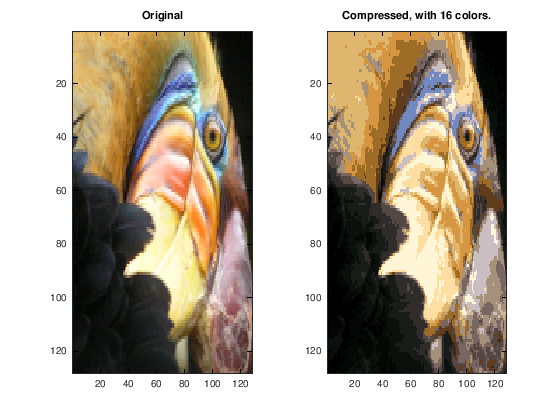

In [114]:
%% ================= Part 5: Image Compression ======================
%  In this part of the exercise, you will use the clusters of K-Means to
%  compress an image. To do this, we first find the closest clusters for
%  each example. After that, we 

fprintf('\nApplying K-Means to compress an image.\n\n');

% Find closest cluster members
idx = findClosestCentroids(X, centroids);

% Essentially, now we have represented the image X as in terms of the
% indices in idx. 

% We can now recover the image from the indices (idx) by mapping each pixel
% (specified by its index in idx) to the centroid value
X_recovered = centroids(idx,:);

% Reshape the recovered image into proper dimensions
X_recovered = reshape(X_recovered, img_size(1), img_size(2), 3);

% Display the original image 
subplot(1, 2, 1);
imagesc(A); 
title('Original');

% Display compressed image side by side
subplot(1, 2, 2);
imagesc(X_recovered)
title(sprintf('Compressed, with %d colors.', K));

## Pipeline Completo Compressão de Imagens

### Centroides Próximos

In [120]:
% Redefinindo função findClosestCentroids
function idx = findClosestCentroids(X, centroids)
%FINDCLOSESTCENTROIDS computes the centroid memberships for every example
%   idx = FINDCLOSESTCENTROIDS (X, centroids) returns the closest centroids
%   in idx for a dataset X where each row is a single example. idx = m x 1 
%   vector of centroid assignments (i.e. each entry in range [1..K])
%

% Set K
K = size(centroids, 1);

% You need to return the following variables correctly.
idx = zeros(size(X,1), 1);

% ====================== YOUR CODE HERE ======================
% Instructions: Go over every example, find its closest centroid, and store
%               the index inside idx at the appropriate location.
%               Concretely, idx(i) should contain the index of the centroid
%               closest to example i. Hence, it should be a value in the 
%               range 1..K
%
% Note: You can use a for-loop over the examples to compute this.
%

% Aplicando pipeline a todo o dataset
m = size(X, 1);
idx = zeros(m, 1);
for i = 1:m
    sample = X(i, :);
    dist = sample - centroids;
    magnitude = [];
    for j = 1:size(dist, 1)
        magnitude = [magnitude; sqrt(sum(dist(j, :).^2))];
    endfor
    
    c = find(min(magnitude) == magnitude);
    if size(c, 1) > 1
        c = c(1);
    end
    idx(i) = c;    
endfor

% =============================================================

end

### Movendo Centroides

In [116]:
function centroids = computeCentroids(X, idx, K)
%COMPUTECENTROIDS returns the new centroids by computing the means of the 
%data points assigned to each centroid.
%   centroids = COMPUTECENTROIDS(X, idx, K) returns the new centroids by 
%   computing the means of the data points assigned to each centroid. It is
%   given a dataset X where each row is a single data point, a vector
%   idx of centroid assignments (i.e. each entry in range [1..K]) for each
%   example, and K, the number of centroids. You should return a matrix
%   centroids, where each row of centroids is the mean of the data points
%   assigned to it.
%

% Useful variables
[m n] = size(X);

% You need to return the following variables correctly.
centroids = zeros(K, n);


% ====================== YOUR CODE HERE ======================
% Instructions: Go over every centroid and compute mean of all points that
%               belong to it. Concretely, the row vector centroids(i, :)
%               should contain the mean of the data points assigned to
%               centroid i.
%
% Note: You can use a for-loop over the centroids to compute this.
%

for i = 1:K
    number = size(find(idx == i), 1);
    centroids(i, :) = sum([idx == i] .* X) / number;
endfor


% =============================================================


end

### Inicializando Centroides

In [117]:
function centroids = kMeansInitCentroids(X, K)
%KMEANSINITCENTROIDS This function initializes K centroids that are to be 
%used in K-Means on the dataset X
%   centroids = KMEANSINITCENTROIDS(X, K) returns K initial centroids to be
%   used with the K-Means on the dataset X
%

% You should return this values correctly
centroids = zeros(K, size(X, 2));

% ====================== YOUR CODE HERE ======================
% Instructions: You should set centroids to randomly chosen examples from
%               the dataset X
%

% Randomly reorder the indices of examples
randidx = randperm(size(X, 1));
% Take the first K examples as centroids
centroids = X(randidx(1:K), :);

% =============================================================

end

### Rodando K-Means

In [118]:
function [centroids, idx] = runkMeans(X, initial_centroids, ...
                                      max_iters, plot_progress)
%RUNKMEANS runs the K-Means algorithm on data matrix X, where each row of X
%is a single example
%   [centroids, idx] = RUNKMEANS(X, initial_centroids, max_iters, ...
%   plot_progress) runs the K-Means algorithm on data matrix X, where each 
%   row of X is a single example. It uses initial_centroids used as the
%   initial centroids. max_iters specifies the total number of interactions 
%   of K-Means to execute. plot_progress is a true/false flag that 
%   indicates if the function should also plot its progress as the 
%   learning happens. This is set to false by default. runkMeans returns 
%   centroids, a Kxn matrix of the computed centroids and idx, a m x 1 
%   vector of centroid assignments (i.e. each entry in range [1..K])
%

% Set default value for plot progress
if ~exist('plot_progress', 'var') || isempty(plot_progress)
    plot_progress = false;
end

% Plot the data if we are plotting progress
if plot_progress
    figure;
    hold on;
end

% Initialize values
[m n] = size(X);
K = size(initial_centroids, 1);
centroids = initial_centroids;
previous_centroids = centroids;
idx = zeros(m, 1);

% Run K-Means
for i=1:max_iters
    
    % Output progress
    fprintf('K-Means iteration %d/%d...\n', i, max_iters);
    if exist('OCTAVE_VERSION')
        fflush(stdout);
    end
    
    % For each example in X, assign it to the closest centroid
    idx = findClosestCentroids(X, centroids);
    
    % Optionally, plot progress here
    if plot_progress
        plotProgresskMeans(X, centroids, previous_centroids, idx, K, i);
        previous_centroids = centroids;
        fprintf('Press enter to continue.\n');
        pause;
    end
    
    % Given the memberships, compute new centroids
    centroids = computeCentroids(X, idx, K);
end

% Hold off if we are plotting progress
if plot_progress
    hold off;
end

end

### Programa Principal


Running K-Means clustering on pixels from an image.

K-Means iteration 1/10...
K-Means iteration 2/10...
K-Means iteration 3/10...
K-Means iteration 4/10...
K-Means iteration 5/10...
K-Means iteration 6/10...
K-Means iteration 7/10...
K-Means iteration 8/10...
K-Means iteration 9/10...
K-Means iteration 10/10...

Applying K-Means to compress an image.



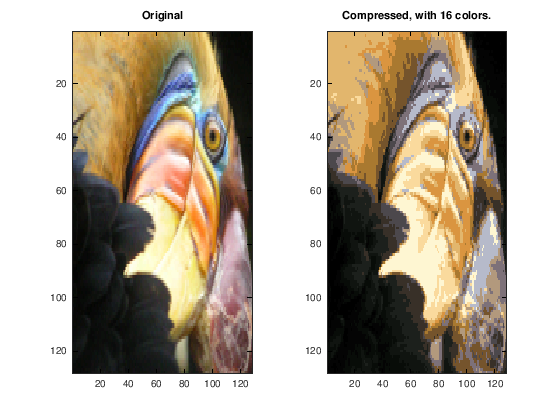

In [121]:
fprintf('\nRunning K-Means clustering on pixels from an image.\n\n');

%  Load an image of a bird
A = double(imread('bird_small.png'));

% If imread does not work for you, you can try instead
%   load ('bird_small.mat');

A = A / 255; % Divide by 255 so that all values are in the range 0 - 1

% Size of the image
img_size = size(A);

% Reshape the image into an Nx3 matrix where N = number of pixels.
% Each row will contain the Red, Green and Blue pixel values
% This gives us our dataset matrix X that we will use K-Means on.
X = reshape(A, img_size(1) * img_size(2), 3);

% Run your K-Means algorithm on this data
% You should try different values of K and max_iters here
K = 16; 
max_iters = 10;

% When using K-Means, it is important the initialize the centroids
% randomly. 
% You should complete the code in kMeansInitCentroids.m before proceeding
initial_centroids = kMeansInitCentroids(X, K);

% Run K-Means
[centroids, idx] = runkMeans(X, initial_centroids, max_iters);


%% ================= Part 5: Image Compression ======================
%  In this part of the exercise, you will use the clusters of K-Means to
%  compress an image. To do this, we first find the closest clusters for
%  each example. After that, we 

fprintf('\nApplying K-Means to compress an image.\n\n');

% Find closest cluster members
idx = findClosestCentroids(X, centroids);

% Essentially, now we have represented the image X as in terms of the
% indices in idx. 

% We can now recover the image from the indices (idx) by mapping each pixel
% (specified by its index in idx) to the centroid value
X_recovered = centroids(idx,:);

% Reshape the recovered image into proper dimensions
X_recovered = reshape(X_recovered, img_size(1), img_size(2), 3);

% Display the original image 
subplot(1, 2, 1);
imagesc(A); 
title('Original');

% Display compressed image side by side
subplot(1, 2, 2);
imagesc(X_recovered)
title(sprintf('Compressed, with %d colors.', K));



Running K-Means clustering on pixels from an image.

error: reshape: can't reshape 260x192 array to 49920x3 array
K-Means iteration 1/10...
K-Means iteration 2/10...
K-Means iteration 3/10...
K-Means iteration 4/10...
K-Means iteration 5/10...
K-Means iteration 6/10...
K-Means iteration 7/10...
K-Means iteration 8/10...
K-Means iteration 9/10...
K-Means iteration 10/10...

Applying K-Means to compress an image.

error: reshape: can't reshape 16384x3 array to 260x192x3 array


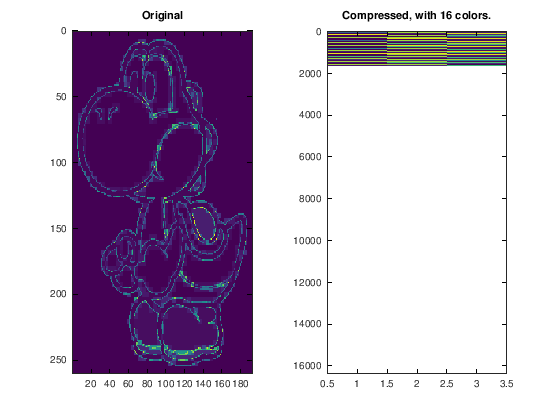

In [122]:
fprintf('\nRunning K-Means clustering on pixels from an image.\n\n');

%  Load an image of a bird
A = double(imread('yoshi.png'));

% If imread does not work for you, you can try instead
%   load ('bird_small.mat');

A = A / 255; % Divide by 255 so that all values are in the range 0 - 1

% Size of the image
img_size = size(A);

% Reshape the image into an Nx3 matrix where N = number of pixels.
% Each row will contain the Red, Green and Blue pixel values
% This gives us our dataset matrix X that we will use K-Means on.
X = reshape(A, img_size(1) * img_size(2), 3);

% Run your K-Means algorithm on this data
% You should try different values of K and max_iters here
K = 16; 
max_iters = 10;

% When using K-Means, it is important the initialize the centroids
% randomly. 
% You should complete the code in kMeansInitCentroids.m before proceeding
initial_centroids = kMeansInitCentroids(X, K);

% Run K-Means
[centroids, idx] = runkMeans(X, initial_centroids, max_iters);


%% ================= Part 5: Image Compression ======================
%  In this part of the exercise, you will use the clusters of K-Means to
%  compress an image. To do this, we first find the closest clusters for
%  each example. After that, we 

fprintf('\nApplying K-Means to compress an image.\n\n');

% Find closest cluster members
idx = findClosestCentroids(X, centroids);

% Essentially, now we have represented the image X as in terms of the
% indices in idx. 

% We can now recover the image from the indices (idx) by mapping each pixel
% (specified by its index in idx) to the centroid value
X_recovered = centroids(idx,:);

% Reshape the recovered image into proper dimensions
X_recovered = reshape(X_recovered, img_size(1), img_size(2), 3);

% Display the original image 
subplot(1, 2, 1);
imagesc(A); 
title('Original');

% Display compressed image side by side
subplot(1, 2, 2);
imagesc(X_recovered)
title(sprintf('Compressed, with %d colors.', K));
